# Question: Which factor(s) is most correlated with youth marijuana use?

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor

In [234]:
data = pd.read_csv('youth_data.csv')
data.head()

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,...,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4
0,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,2,2,1,2,2
1,991,60,91.0,91,91.0,2.0,991,991,991,14,...,1,6,0,1,1,2,2,1,2,2
2,1,991,91.0,91,93.0,91.0,991,991,11,991,...,1,2,1,1,1,4,2,3,1,1
3,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,2,0,1,1,3,2,2,1,1
4,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,2,2


In [235]:
data.shape

(10561, 79)

In [236]:
data.columns

Index(['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM',
       'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'MRJFLAG', 'ALCFLAG',
       'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS',
       'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ',
       'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2',
       'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND',
       'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM',
       'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10',

In [ ]:
# features of interest
# I grouped them into categories which I think might have an influence
edu = ['AVGGRADE', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM']
family = ['PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR']
peer = ['FRDMEVR2', 'FRDMJMON']
mental_health = ['SCHFELT', 'TALKPROB', 'PRTALK3', 'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2']
demographics = ['IRSEX', 'NEWRACE2', 'HEALTH2', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10', 'COUTYP4']

# target variables
target = ['MRJFLAG', 'MRJYDAYS', 'MRJMDAYS']

In [238]:
data = data[(edu + family + peer + mental_health + demographics + target)]
data.head()

,AVGGRADE,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,...,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4,MRJFLAG,MRJYDAYS,MRJMDAYS
0,2.0,1,3,0,1.0,1.0,1.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,0,6,5
1,2.0,1,6,0,1.0,1.0,2.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,1,3,1
2,2.0,1,2,1,1.0,1.0,1.0,1.0,1.0,2.0,...,1,1,4,2,3,1,1,0,6,5
3,NaN,1,2,0,1.0,2.0,2.0,2.0,2.0,1.0,...,1,1,3,2,2,1,1,0,6,5
4,2.0,1,5,0,2.0,1.0,1.0,2.0,2.0,1.0,...,1,1,4,2,3,2,2,0,6,5


In [239]:
data.columns

Index(['AVGGRADE', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM', 'PARCHKHW',
       'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN', 'PRGDJOB2', 'PRPROUD2',
       'ARGUPAR', 'FRDMEVR2', 'FRDMJMON', 'SCHFELT', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'IRSEX',
       'NEWRACE2', 'HEALTH2', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG',
       'POVERTY3', 'PDEN10', 'COUTYP4', 'MRJFLAG', 'MRJYDAYS', 'MRJMDAYS'],
      dtype='object')

In [ ]:
# rename the columns to be more interpretable and readable later on
data.columns = [
    'Avg_Grades',                # AVGGRADE
    'School_Attendance',         # EDUSCHLGO
    'Highest_Grade',             # EDUSCHGRD2
    'School_Problems_Comm',      # EDUSKPCOM
    'Parent_Checks_Homework',    # PARCHKHW
    'Parent_Helps_Homework',     # PARHLPHW
    'Does_Chores',               # PRCHORE2
    'Limited_TV_Time',           # PRLMTTV2
    'Parents_Set_Limits',        # PARLMTSN
    'Good_Job_Approval',         # PRGDJOB2
    'Parent_Pride',              # PRPROUD2
    'Parent_Arguments',          # ARGUPAR
    'Friend_Offered_Drugs',      # FRDMEVR2
    'Friends_Use_Marijuana',     # FRDMJMON
    'School_Felt_Unsafe',        # SCHFELT
    'Talked_About_Problems',     # TALKPROB
    'Can_Talk_To_Parents',       # PRTALK3
    'Problem_Solving_Support',   # PRBSOLV2
    'Violent_Peer_Influence',    # PREVIOL2
    'Private_Doctor_Visits',     # PRVDRGO2
    'Group_Counseling',          # GRPCNSL2
    'Pregnancy_Program',         # PREGPGM2
    'Sex',                       # IRSEX
    'Race',                      # NEWRACE2
    'Health_Status',             # HEALTH2
    'Mother_Present',            # IMOTHER
    'Father_Present',            # IFATHER
    'Household_Income',          # INCOME
    'Govt_Assistance_Use',       # GOVTPROG
    'Poverty_Level',             # POVERTY3
    'Population_Density',        # PDEN10
    'County_Type',               # COUTYP4
    'Used_Marijuana_Flag',       # MRJFLAG (target, binary)
    'Days_Used_This_Year',       # MRJYDAYS (target, multiclass)
    'Days_Used_This_Month'       # MRJMDAYS (target, reg)
]

In [241]:
# check for null/missing values
print(data.isna().sum().tolist())

[716, 0, 0, 0, 77, 89, 35, 68, 259, 63, 77, 180, 152, 152, 0, 336, 199, 286, 142, 102, 120, 98, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [242]:
data.shape, data.dropna().shape
# if we drop rows with missing values, we lose too much data (~10%) so impute instead

((10561, 35), (8967, 35))

In [243]:
set(data.dtypes) # we only have numerical data types so just impute with mean

{dtype('int64'), dtype('float64')}

In [244]:
for col in list(data.columns):
    if data[col].isna().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())

In [245]:
data.head()

,Avg_Grades,School_Attendance,Highest_Grade,School_Problems_Comm,Parent_Checks_Homework,Parent_Helps_Homework,Does_Chores,Limited_TV_Time,Parents_Set_Limits,Good_Job_Approval,...,Mother_Present,Father_Present,Household_Income,Govt_Assistance_Use,Poverty_Level,Population_Density,County_Type,Used_Marijuana_Flag,Days_Used_This_Year,Days_Used_This_Month
0,2.000000,1,3,0,1.0,1.0,1.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,0,6,5
1,2.000000,1,6,0,1.0,1.0,2.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,1,3,1
2,2.000000,1,2,1,1.0,1.0,1.0,1.0,1.0,2.0,...,1,1,4,2,3,1,1,0,6,5
3,1.941696,1,2,0,1.0,2.0,2.0,2.0,2.0,1.0,...,1,1,3,2,2,1,1,0,6,5
4,2.000000,1,5,0,2.0,1.0,1.0,2.0,2.0,1.0,...,1,1,4,2,3,2,2,0,6,5


In [ ]:
# prep data
train = data.drop(columns = ['Used_Marijuana_Flag', 'Days_Used_This_Year', 'Days_Used_This_Month'])
test = data['Used_Marijuana_Flag']
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = .2, random_state = 5322)

In [259]:
# Decision Tree with CV for binary classification 
# Used marijuana before or not

param_grid = {
    'max_depth': [3, 5, 10, 20, x_train.shape[1]],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

binary = DecisionTreeClassifier(random_state = 5322)
grid_search = GridSearchCV(
    estimator = binary,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5322),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 10, 20, 32],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='f1', verbose=1)

In [ ]:
# optimal hyperparameters
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
# optimal model & results
best_binary = grid_search.best_estimator_

binary_pred = best_binary.predict(x_test)
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1781
           1       0.52      0.60      0.56       332

    accuracy                           0.85      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.86      0.85      0.85      2113



Class 0 (No marijuana used ever):
- Precision: .92 --> Of all the people predicted as non-users of marijuana, 92% were actually non-users. This means our model is good at identifying non-users. Few false positives
- Recall: .90 --> Of all the actual non-users, 90% were correctly identified as non-users. This means our model is good at catching non-users. Few false negatives.
- F1-score .91: Suggests the model is good at identifying non-users

Class 1 (Used marijuana):
- Precision: .52 --> Of all the people predicted to be users of marijuana, only 52% were actually users. This means the model is not good at identifying users of marijuana. Some false positives
- Recall: .60--> Of all the actual marijuana users, 60% were correctly identified. This means the model is not good at catching users. Some false negatives.
- F1-score: .56 --> Suggests model struggles with identifying users of marijuana.

Accuracy: .85 --> 85% is a good accuracy, but it is a little midleading since our data has very clear class imbalance. Far more people who have not used versus used, so our model does well on non-users, but very poorly on users.

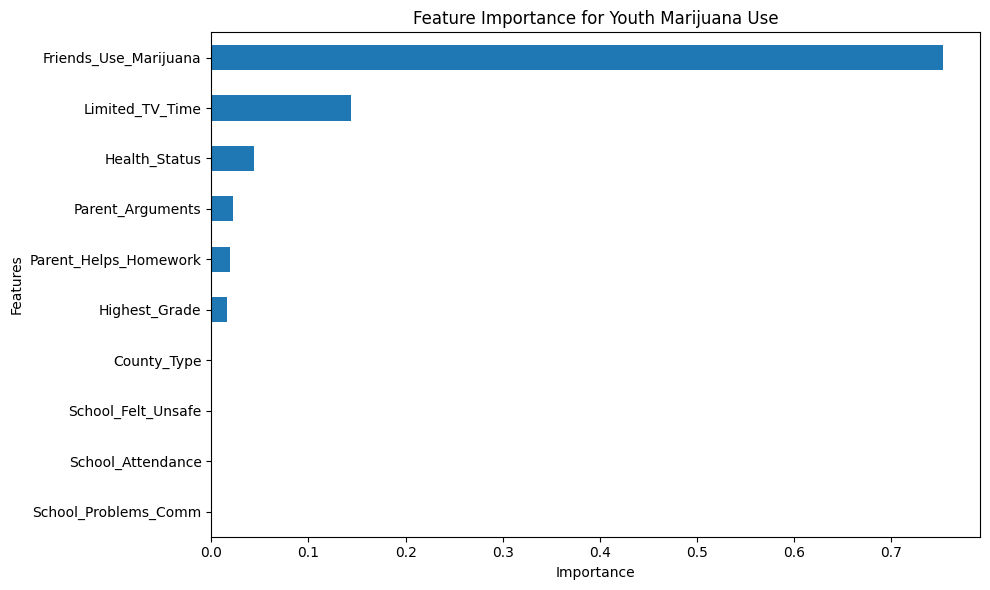

In [ ]:
# see which features are most influential
importances = pd.Series(
    best_binary.feature_importances_, 
    index = x_train.columns
).sort_values(ascending = True)

plt.figure(figsize = (10, 6))
importances.tail(10).plot(kind = 'barh')
plt.title("Feature Importance for Youth Marijuana Use")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Friends Use Marijuana is the most influential factor by far. Peer pressure is real I guess. The others were mostly pretty intuitive or things you have heard or read about in papers (parents aruge, problems with school, etc.). The only surprising factor was Parent Helps Homework. Smoking marijuana depending on whether your parents helped you on your homework seems a very weird. Limited TV Time was also somewhat surprising, but I figured if you watch a lot of tv shows where the main characters use drugs could definitely have an influence.